# Importing Modules

In [17]:
import import_ipynb
import CFAR_v2 as cfarv2
import GeoProcess as gp
import numpy as np
import imageResizing as ir
from osgeo import gdal

DATA_PATH = 'Dataset_963A/'

In [10]:
#Computing rows and columns
band_data_arr = gp.readGeoTiff(DATA_PATH+'LandMasked_Amplitude_VV.tif')
#subset_img = gp.readGeoTiff('Dataset_963A/CFARResults/meanfiltered_img.tif')
rows,col = band_data_arr.shape
#print(rows,col)
#gp.visualizeImg(band_data_arr)

(1200, 1200)
Image Saved Succesfully.


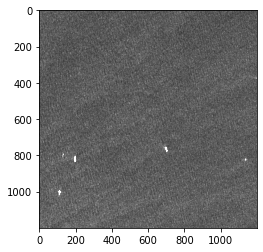

In [3]:
#subset_img = (gp.subsetImg(band_data_arr,4800,6000)) #single ship
#subset_img = gp.subsetImg(band_data_arr,4950,5700) #multiple ship.

#subset_img = band_data_arr[5853:5888,4594:4621]
#subset_img = (ir.adjustImg(np.array(subset_img)))
print(subset_img.shape)
gp.visualizeImg(subset_img)
gp.save_img2Geotiff(subset_img,DATA_PATH+'CFARResults/Input.tif')

In [11]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
backgroundWindow_size = 35
guardWindow_size = 33
targetWindow_size = 31
pfa = 20

In [13]:
print("CFAR Version 2")
cfar_version2 = cfarv2.CFAR_v2(band_data_arr,targetWindow_size,guardWindow_size,backgroundWindow_size,pfa)
finalImg_version2, DV_img,T_img = cfar_version2.shipDetection()

# print("CFAR version 1")
# cfar_filter = cfar.CFAR(subset_img,backgroundWindow_size,guardWindow_size,targetWindow_size,pfa,kernel)
# finalImg = cfar_filter.Shipdetection()

CFAR Version 2
Kernel Ready.
Computing DVi..


CFAR_v2.ipynb:120: RuntimeWarning: invalid value encountered in float_scalars
  "    def compute_DV(self):\n",
CFAR_v2.ipynb:120: RuntimeWarning: divide by zero encountered in double_scalars
  "    def compute_DV(self):\n",



Process completed, DV image succesfully Computed.

Binary Image of Ships is Succesfully Generated.



0

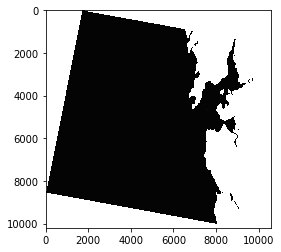

In [21]:
gp.visualizeBinaryImg(DV_img)
#gp.save_img2Geotiff(DV_img,'Dataset_963A/CFARResults/Output_DVCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

0

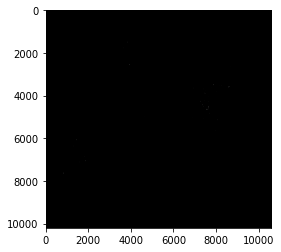

In [26]:
gp.visualizeBinaryImg(finalImg_version2)
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create('Dataset_963A/CFARResults/Output_SHIPCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif', col, rows, 1, gdal.GDT_Int16)
outdata.GetRasterBand(1).WriteArray(finalImg_version2)
#gp.save_img2Geotiff(finalImg_version2,'Dataset_963A/CFARResults/Output_SHIPCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

Image Saved Succesfully.


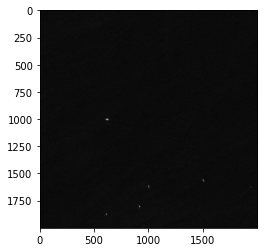

In [30]:
# gp.visualizeBinaryImg(T_img)
# gp.save_img2Geotiff(T_img,'Dataset_963A/CFARResults/Output_TCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

In [ ]:
# gp.visualizeBinaryImg(finalImg)
# gp.save_img2Geotiff(finalImg,'Dataset_963A/CFARResults/Output_'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')